In [10]:
from idlelib.config_key import ALPHANUM_KEYS

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons as data
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [27]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE)

ALPHA = 0.001
TEST_SIZE = 0.2
NOISE = 0.2
EPOCHS =2001
N_SAMPLE = 1000

# params =

In [12]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples = N_SAMPLE,
                 shuffle = True,
                 # noise = NOISE,
                 random_state = RANDOM_STATE
                 )
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [13]:
X

array([[ 0.67874295,  0.73437593],
       [-0.61146339,  0.79127273],
       [ 1.99427795,  0.39317601],
       ...,
       [ 0.35415203,  0.93518786],
       [ 1.80827624, -0.08880346],
       [-0.87276505,  0.48814053]], shape=(1000, 2))

In [14]:
X[:5], y[:5]

(array([[ 0.67874295,  0.73437593],
        [-0.61146339,  0.79127273],
        [ 1.99427795,  0.39317601],
        [-0.98953437,  0.14429736],
        [-0.99873189,  0.05034492]]),
 array([0, 0, 1, 0, 0]))

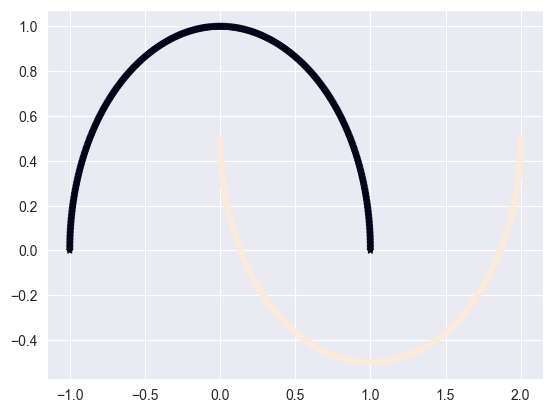

In [15]:
plt.scatter(X[:,0],X[:,1],s = 20, c = y, marker = "*");

# day3

In [16]:
data_df = pd.DataFrame(X,columns = ['A','B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.678743,0.734376,0
1,-0.611463,0.791273,0
2,1.994278,0.393176,1
3,-0.989534,0.144297,0
4,-0.998732,0.050345,0


In [18]:
data_train,data_test = data_df.to_numpy()[:900],data_df.to_numpy()[900,:]
data_train.shape,data_test.shape

#day4
# x_train,x_test,y_train,y_test = train_test_split(x,y,stratify = y,test_size = TEST_SIZE,random_state = RANDOM_STATE)
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

((900, 3), (3,))

In [19]:
def fn_sigmoid(z:np.ndarray)->float:
    return 1/(1+np.exp(-z))


In [20]:
sm = fn_sigmoid(np.asarray([-np.inf,0,np.inf]))


In [ ]:
def fn_activ(z):
    return np.tanh(z)
def fn_activ_prime(z):
    return 1 - np.tanh(z)**2

In [ ]:
fn_activ(np.asarray([-1,0,1],[-np.inf,0,np.inf]))

In [22]:
def predict(row,weights):
  z= weights[0]
  for i in range(len(row)-1):
    z+=weights[i+1]
  # return 1 if z>=0 else 0      ##activation
  return fn_sigmoid(z)

In [ ]:
def calculate_loss(model,X):
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']

    ## Forward Propogation
    z1 = X.dot(W1) +b1
    a1 = fn_activ(z1)

    z2 = a1.dot(W2) + b2
    a2 = fn_sigmoid(z2)
    data_loss = -(y*np.log(a2)+(1-y)*np.log(1-a2)).sum()
    return data_loss/m

In [23]:
weights = np.array([0.1,2.0,1.0])
predict(data_df.loc[0].to_numpy(),weights)

np.float64(0.9568927450589139)

In [ ]:
def fn_plot_decision_boundry(data_train,model.predict):
    fig,ax = plt.subplots()
    dw = 0.01
    margin = 10*dw
    x_max =

In [ ]:
fn_plot_decision_boundry()

In [ ]:
loss_df =

In [24]:
# def train_weights(train,alpha,n_epoc):
#     error = a-y
#     weights = rng.random(train.train.shape[1]) ##initialize weights
#     m = train.shape[0]
#     for epoch in range(n_epoch):
#       sum_error = 0
#       for row in train:
#         a = predict(row,weights)
#         dz = a - row[-1]                          #(a-y
#         # sum_error += (prediction - row[-1])**2
#         error += -row[-1] *np.log(a) - (1-row[-1]) * np.log(1-a) #Binary error
#         sum_error+=error
#         weights[0] = weights[0] - alpha * dz
#         for i in range(len(row)-1):
#           weights[i+1] = weights[i+1] - alpha * dz * row[i]
#       error.append(sum_error/m)                                 ##Average error
#     return error,weights

In [ ]:
def build_model(nn_ndim,X,y,alpha,n_epoch):
    m,nn_input_dim = X.shape
    nn_output_dim = y.shape[1]
    W1 = rng.random(nn_input_dim,nn_hdim)/np.sqrt(nn_input_dim)
    W2 = rng.random(nn_hdim,nn_output_dim)/np.sqrt(nn_hdim)
    b1 = np.zeros((1,nn_hdim))
    b2 = np.zeros((1,nn_output_dim))

    loss,epoch = [],[]
    for i in range(n_epoch):
        z1= X.dot(W1) + b1
        a1 = fn_activ(z1)
        a2 = a1.dot(W2) + b2
        a2 = fn_sigmoid(z2)
        dz2 = a2-y
        assert(z2.shape == dz2.shape),'Shape z2:{z2.shape,dz2.shape}'
        dw2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape),'Shape z2:{W2.shape,dW2.shape}'
        db2 = np.sum(dz2,axis = 0, keepdims = True)
        assert(b2.shape == db2.shape),'Shape z2:{b2.shape,db2.shape}'
        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape),'Shape z2:{a1.shape,da2.shape}'

        dz2 = da1 * fn_activ_prime(z1)
        assert(z1.shape= dz1.shape),'Shape z1:{z1.shape,dz1.shape}'
        dw2 = (X.T).dot(dz1)
        assert(W1.shape == dW1.shape),'Shape z2:{W2.shape,dW2.shape}'
        db2 = np.sum(dz2,axis = 0, keepdims = True)
        assert(b2.shape == db2.shape),'Shape z2:{b2.shape,db2.shape}'
        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape),'Shape z2:{a1.shape,da2.shape}'

        W1 = W1 -alpha  *dW1/m
        b1 = b1 - alpha * db1/m
        W2 = W2 -alpha*dW2/m
        b2 = b2-alpha*db2/m


    model = {'W1':W1,'W2':W2,'b1':b1,'b2':b2}
    return model

In [ ]:
loss_hist = {}
y_train = y_train.reshape(-1,1)
y_train.shape

In [ ]:
model = build_model(4,X_train,y_train,alpha,n_epoch= EPOCHS)
model

In [30]:
err,weights = train_weights(train = data_train,alpha = ALPHA,n_epoc=EPOCHS)
weights

UnboundLocalError: cannot access local variable 'a' where it is not associated with a value

In [ ]:
def fn_plot_decision_boundry():
    ig,ax = plt.subplots()
    dw = 0.01
    margin * dw
    x_max,x_min = X[;,0].max()+margin,X[:,0].min()-margin
    y_max,y_min = X[]

In [ ]:
fn_plot_decision_boundary()

In [ ]:
plt.plot(err)

In [1]:
fig,ax = plt.sublpots()
dm = 0.01
margin = 10 * dm
x_max,x_min = X[:,0].max() + margin,X[:,0].min() - margin
y_max,y_min = X[:,0].max() + margin,X[:,0].min() - margin
xx,yy = np.meshgrid(np.arange(x_min,x_max,dm),np.arange(y_min,y_max,dm))
X_plot = np.c_[xx.ravel(),yy.ravel()]
X_plot = np.hstack((X_plot,np.ones((X_plot.shape[0],1))))
y_pred = []
for row in xx:
    a = pred_func(row,weights)
    y_p = 0
    if a>=0.5: y_p =1
    y_pred.append(y_p)
Z = np.array(y_pred).reshape(xx.shape)
ax.contour(xx,yy,Z,alpha = 0.6,cmap = CMAP)
ax.scatter(X[:,0],X[:,1],c = y,s = 30,edgecolors = 'k',cmap = CMAP)

NameError: name 'plt' is not defined